In [ ]:
 from google.colab import drive

#  drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install matplotlib==3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.5.0 which is incompatible.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# File Directory for both the train and test
df =pd.read_csv("gdrive/MyDrive/dataset_interface/Dataset.csv")
df

,Category,Description
0,Content,Fantastic program! Instant search results and...
1,Content,Great browser nice and fast. Please add force...
2,Uniformity,The best and Light-weight browser on Android....
3,Uniformity,Thank you dev. Love the ui. Love the smooth...
4,Navigation,Yeah... I'm greedy. First and foremost - supp...
...,...,...
2393,Content,I am only giving this app three star because s...
2394,Content,its so helpfull for me having online class u c...
2395,Interactivity,Very nice up... It could be best if sending vo...
2396,LoadingSpeed,"Why when I want to send files, images, videos ..."


In [ ]:
# df1=df.iloc[:, 1]
df=df[["Category","Description"]]
df


,Category,Description
0,Content,Fantastic program! Instant search results and...
1,Content,Great browser nice and fast. Please add force...
2,Uniformity,The best and Light-weight browser on Android....
3,Uniformity,Thank you dev. Love the ui. Love the smooth...
4,Navigation,Yeah... I'm greedy. First and foremost - supp...
...,...,...
2393,Content,I am only giving this app three star because s...
2394,Content,its so helpfull for me having online class u c...
2395,Interactivity,Very nice up... It could be best if sending vo...
2396,LoadingSpeed,"Why when I want to send files, images, videos ..."


In [ ]:
df['Category'].value_counts()

Content          622
Interactivity    542
Readability      376
ColorScheme      252
Uniformity       189
Accessibility    176
ScreenSize       166
Navigation        44
LoadingSpeed      31
Name: Category, dtype: int64

In [ ]:
df.count()

Category       2398
Description    2398
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize =(10, 7))

<Figure size 1000x700 with 0 Axes>

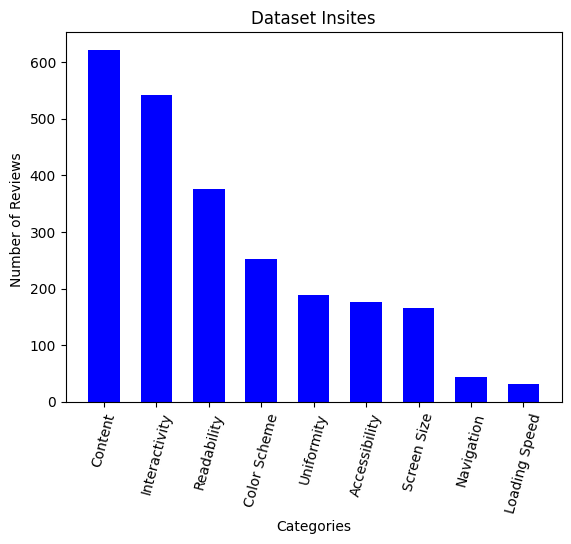

In [ ]:
# import matplotlib.pyplot as plt
# # plotting a histogram

# categories = df['Category'].value_counts().tolist()
# range = (1,9)
# plt.hist( categories, range, color = 'green',histtype = 'bar')
# plt.xlabel('categories')
# plt.ylabel('total Reviews')
# plt.title('My histogram')
# plt.show()


import matplotlib.pyplot as plt

left = [1, 2, 3, 4, 5,6,7,8,9]

# heights of bars
height = df['Category'].value_counts().tolist()

# labels for bars
tick_label = ['Content', 'Interactivity', 'Readability', 'Color Scheme', 'Uniformity','Accessibility','Screen Size','Navigation','Loading Speed']

# plotting a bar chart
plt.bar( left,height, tick_label = tick_label,
        width = 0.6, color = ['blue'])

# naming the x-axis
plt.xlabel('Categories')
# naming the y-axis
plt.ylabel('Number of Reviews ')
# plot title
plt.title('Dataset Insites')
plt.xticks(rotation=75)

# function to show the plot
plt.show()

In [ ]:
############################################################3


In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    title = re.sub('[^a-zA-Z]', ' ', df['Description'][i]) #Remove special charactor and numbers
    title = title.lower()
    title = title.split() #split to every word from santance

    title= [char for char in title if char not in string.punctuation]
    title = ' '.join(title) #Join all title into a string
    corpus.append(title)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


#Creating the bag of words
bow_transfarmer = CountVectorizer().fit(corpus) #convert all santance into vector form
b=bow_transfarmer.vocabulary_ # tells whic perticular number assign to which word



In [ ]:
#Punctuation Removal:
import string
string.punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['Description'].apply(lambda x:remove_punctuation(x))
df[['Description','clean_msg']].head()

,Description,clean_msg
0,Fantastic program! Instant search results and...,Fantastic program Instant search results and ...
1,Great browser nice and fast. Please add force...,Great browser nice and fast Please add force ...
2,The best and Light-weight browser on Android....,The best and Lightweight browser on Android I...
3,Thank you dev. Love the ui. Love the smooth...,Thank you dev Love the ui Love the smoothne...
4,Yeah... I'm greedy. First and foremost - supp...,Yeah Im greedy First and foremost support th...


In [ ]:
#Lowering the text:

df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())
df[['clean_msg','msg_lower']].head()

,clean_msg,msg_lower
0,Fantastic program Instant search results and ...,fantastic program instant search results and ...
1,Great browser nice and fast Please add force ...,great browser nice and fast please add force ...
2,The best and Lightweight browser on Android I...,the best and lightweight browser on android i...
3,Thank you dev Love the ui Love the smoothne...,thank you dev love the ui love the smoothne...
4,Yeah Im greedy First and foremost support th...,yeah im greedy first and foremost support th...


In [ ]:
#defining function for tokenization
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenization(text):
    # tokens = re.split('W+',text)
    tokens = nltk.word_tokenize(text)
    return tokens

# #applying function to the column
df['msg_tokenied']= df['msg_lower'].apply(lambda x: tokenization(x))
df[['msg_lower','msg_tokenied']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,msg_lower,msg_tokenied
0,fantastic program instant search results and ...,"[fantastic, program, instant, search, results,..."
1,great browser nice and fast please add force ...,"[great, browser, nice, and, fast, please, add,..."
2,the best and lightweight browser on android i...,"[the, best, and, lightweight, browser, on, and..."
3,thank you dev love the ui love the smoothne...,"[thank, you, dev, love, the, ui, love, the, sm..."
4,yeah im greedy first and foremost support th...,"[yeah, im, greedy, first, and, foremost, suppo..."


In [ ]:
#Stop word removal:

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df['no_stopwords']= df['msg_tokenied'].apply(lambda x:remove_stopwords(x))
df[['msg_tokenied','no_stopwords']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,msg_tokenied,no_stopwords
0,"[fantastic, program, instant, search, results,...","[fantastic, program, instant, search, results,..."
1,"[great, browser, nice, and, fast, please, add,...","[great, browser, nice, fast, please, add, forc..."
2,"[the, best, and, lightweight, browser, on, and...","[best, lightweight, browser, android, hope, fe..."
3,"[thank, you, dev, love, the, ui, love, the, sm...","[thank, dev, love, ui, love, smoothness, way, ..."
4,"[yeah, im, greedy, first, and, foremost, suppo...","[yeah, im, greedy, first, foremost, support, d..."


In [ ]:
#Lemmatization:
#Original_Word	After_Stemming	After_Lemmatization
#goose	        goos	          goose
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df['msg_lemmatized']=df['no_stopwords'].apply(lambda x:lemmatizer(x))
df[['no_stopwords','msg_lemmatized']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,no_stopwords,msg_lemmatized
0,"[fantastic, program, instant, search, results,...","[fantastic, program, instant, search, result, ..."
1,"[great, browser, nice, fast, please, add, forc...","[great, browser, nice, fast, please, add, forc..."
2,"[best, lightweight, browser, android, hope, fe...","[best, lightweight, browser, android, hope, fe..."
3,"[thank, dev, love, ui, love, smoothness, way, ...","[thank, dev, love, ui, love, smoothness, way, ..."
4,"[yeah, im, greedy, first, foremost, support, d...","[yeah, im, greedy, first, foremost, support, d..."


In [ ]:
##############################################################

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
!pip install lazypredict

In [ ]:
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# constent values that can be change

vocab_size = 3500
embedding_dim = 64
max_length = 296
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<MS>'
training_portion = .8

In [ ]:
# divide dataset into two list -and- remove stopwords(e.g is , are ,am)

articles = []
labels = []

with open("gdrive/MyDrive/dataset_interface/FinalDataset.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

FileNotFoundError: [Errno 2] No such file or directory: 'gdrive/MyDrive/dataset_interface/FinalDataset.csv'

# Tokenize all dataset


In [ ]:
#fit_on_texts method creates the vocabulary index based on word frequency

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(articles)
word_index = tokenizer.word_index


In [ ]:
#texts_to_sequences(.)  it basically takes each word in the text and replaces it with its  integer value from the word_index
all_data_sequences = tokenizer.texts_to_sequences(articles)
len(all_data_sequences)

In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
all_label_seq = np.array(label_tokenizer.texts_to_sequences(labels))
len(all_label_seq)

In [ ]:
all_padded = pad_sequences(all_data_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Apply Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_training_inputs, resampled_training_outputs_labels = sm.fit_resample(all_padded, all_label_seq)
# Counter(resampled_training_outputs_labels)

In [ ]:

plt.show()

In [ ]:

labels = ['Content', 'Interactivity', 'Readability', 'Color Scheme', 'Uniformity','Accessibility','Screen Size','Navigation','Loading Speed']
train_list = [622,622,622,622,622,622,622,622,622]
val_list = [622, 542, 376, 252, 189, 176, 166, 44, 31]


x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='After SMOTE',hatch='///',fill=False)
rects2 = ax.bar(x, val_list, width, label='Before SMOTE',hatch='..',fill=False)


# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Images Count')
fig.set_figwidth(16)
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=30)
ax.legend()
ax.bar_label(rects1,padding=5)
ax.bar_label(rects2,padding=5)

ax.set_ylim([None,850])
#ax.set_xlim([None, 4])
#fig.tight_layout()]


plt.show()

#Lesk Algorithm: Word Sense Disambiguation

In [ ]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize

In [ ]:
#Explanation Code
# function SIMPLIFIED LESK(word,sentence) returns best sense of word
# best-sense <- most frequent sense for word
# max-overlap <- 0
# context <- set of words in sentence
# for each sense in senses of word do
# signature <- set of words in the gloss and examples of sense
# overlap <- COMPUTEOVERLAP (signature,context)
# if overlap > max-overlap then
# max-overlap <- overlap
# best-sense <- sense
# end return (best-sense)


In [ ]:
a1= lesk(word_tokenize(': layout is not set properly'),'light')
print(a1,a1.definition())
a2 = lesk(word_tokenize('app that uses colors that is too light'),'light')
print(a2,a2.definition())

Synset('light.s.20') intended primarily as entertainment; not serious or profound
Synset('luminosity.n.01') the quality of being luminous; emitting or reflecting light


#Tokenize Train and Test

In [ ]:
# Total  2398 articles and define training set and validation set by 80:20 ratio

train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print("train_articles:",len(train_articles))
print("train_labels:",len(train_labels))
print("validation_articles:",len(validation_articles))
print("validation_labels:",len(validation_labels))


0
train_articles: 0
train_labels: 0
validation_articles: 0
validation_labels: 0


In [ ]:
from collections import Counter
Counter(train_labels)

In [ ]:
Counter(validation_labels)

In [ ]:
#tokeninzation
#fit_on_texts method creates the vocabulary index based on word frequency

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index


#traning data prepare

In [ ]:
#texts_to_sequences(.)  it basically takes each word in the text and replaces it with its  integer value from the word_index
train_sequences = tokenizer.texts_to_sequences(train_articles)


In [ ]:
dict(list(word_index.items())[0:10])
#"MS" in bracket is number 1, "said" is number 2

{'<MS>': 1}

In [ ]:
#9th article in training data converted to sequences
print(train_sequences[8])

IndexError: list index out of range

In [ ]:

# use pad_sequences to make all of our articles the same length, in this code 190 length is use

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[2]))
print(len(train_padded[2]))

print(len(train_sequences[11]))
print(len(train_padded[11]))

In [ ]:
data = load_breast_cancer()


In [ ]:
print(len(train_sequences))
print(train_padded.shape)
type(train_padded)

0


NameError: name 'train_padded' is not defined

In [ ]:
max_len = max([len(i) for i in train_sequences])
print(max_len)
#The traning santances maximum length is 296 that whay i set the max_length libraray crop to 296

ValueError: max() arg is an empty sequence

In [ ]:
# you can see that 68 zeros added automatically to 3rd article -->
print(train_sequences[2])

In [ ]:
X = data.data
y= data.target

# validate DAta prepaer


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)

In [ ]:
print(validation_sequences[5])

In [ ]:
max_len = max([len(i) for i in validation_sequences])
print(max_len)
#The validation_sequences maximum length is 139 that whay i set the max_length libraray crop to 296

In [ ]:
#use pad_sequences to make all of our articles the same length, in this code 190 length is use
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

#labels prepare


In [ ]:
print(set(labels))

In [ ]:
# our labels are text so need to tokenize them---> convert to numpy arrays


In [ ]:

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq.shape)

# # print(validation_label_seq[0])
# print(validation_label_seq[1])
# print(validation_label_seq.shape)


# original article vs article after padding look like. after explorring 12th article. #we can see that some words become OOV(not in vocab)

#i replace the orignanal values for OOV--> for traning purposes

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_sequences[11]))
print('---')
print(train_articles)

In [ ]:
len(train_padded)

In [ ]:
Counter(resampled_training_outputs_labels)

In [ ]:
len(resampled_training_inputs)

#multiple algorithms at once

In [ ]:
# X = validation_padded
# y= validation_label_seq

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.99,random_state =100)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(predictions)

100%|██████████| 29/29 [00:01<00:00, 15.43it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 4, number of negative: 1
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 5, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.800000 -> initscore=1.386294
[LightGBM] [Info] Start training from score 1.386294
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there 